# Chicago Car Crashes Churn Prediction Project

## Introduction
This project focuses on predicting customer churn using a Chicago Car Crashes dataset. Customer churn, in this context, refers to customers ending their relationship with the service. The objective is to build machine learning models that can identify potential churners based on various features.

## Dataset Overview
The Chicago Car Crashes dataset contains information about car crashes and includes features such as 'state', 'account length', 'area code', 'international plan', 'voice mail plan', and more. The target variable is 'churn', indicating whether a customer has churned (True) or not (False).

## Data Exploration
The project starts with loading and exploring the dataset. It includes displaying basic information about the dataset, checking the list of columns, and exploring the distribution of the target variable ('churn') using a count plot.

In [199]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Chicago Car Crashes dataset
crashes_df = pd.read_csv('/home/amina/data-science/Projects/dsc-phase-3-project-v2-3/ChicagoCarCrashes.csv')  # Replace 'path_to_dataset' with the actual path

# Display basic information about the dataset
print(crashes_df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [200]:
# Print the list of columns in the DataFrame
print(crashes_df.columns)


Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


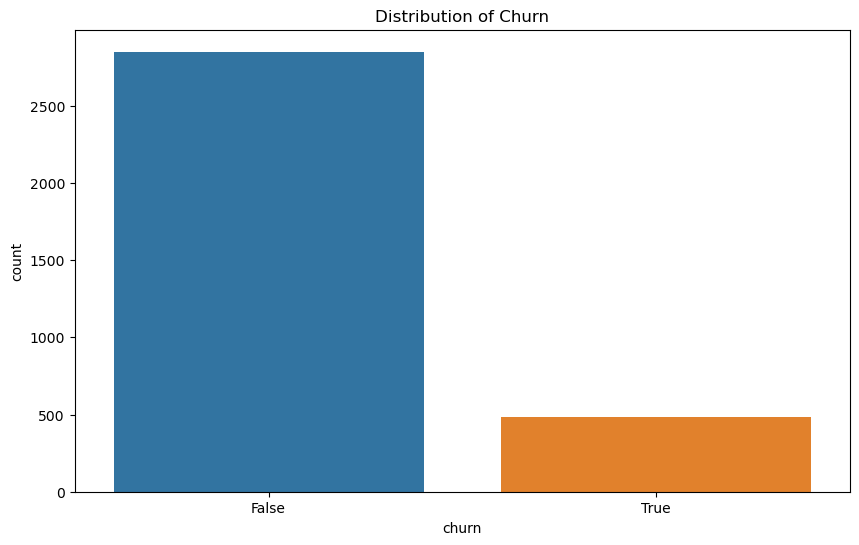

In [201]:
# Explore target variable distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='churn', data=crashes_df)  # Replace 'your_dataframe' with the actual variable name of your DataFrame
plt.title('Distribution of Churn')
plt.show()


## Data Preprocessing and Model Building
1. Drop Unnecessary Columns: The 'phone number' column is dropped as it does not contribute to predicting churn.

2. Label Encoding: Categorical columns like 'state', 'international plan', and 'voice mail plan' are encoded using Label Encoding.

3. Train-Test Split: The data is split into training and testing sets.

4. Baseline Model: A baseline Random Forest model is built and evaluated.

5. Complex Model: A more complex Random Forest model is constructed with additional parameters.

6. Tuned Model: The complex model is further tuned with hyperparameter adjustments.

7. Evaluation: Model performance is evaluated using accuracy, confusion matrix, and classification report.

In [202]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [203]:
# Drop unnecessary columns
crashes_df.drop(['phone number'], axis=1, inplace=True)

In [204]:
# Convert categorical columns to numerical using Label Encoding
label_encoder = LabelEncoder()
categorical_columns = ['state', 'international plan', 'voice mail plan']
for col in categorical_columns:
    crashes_df[col] = label_encoder.fit_transform(crashes_df[col])


In [205]:
# Split the data into features (X) and target variable (y)
X = crashes_df.drop('churn', axis=1)
y = crashes_df['churn']

In [206]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [207]:
# Build a baseline Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [208]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [209]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [210]:
# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.95

Confusion Matrix:
[[561   5]
 [ 29  72]]

Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.99      0.97       566
        True       0.94      0.71      0.81       101

    accuracy                           0.95       667
   macro avg       0.94      0.85      0.89       667
weighted avg       0.95      0.95      0.95       667



In [211]:
# Build a more complex Random Forest model
rf_complex_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_complex_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [212]:
# Make predictions on the test set
y_pred_complex = rf_complex_model.predict(X_test)

In [213]:
# Evaluate the more complex model
accuracy_complex = accuracy_score(y_test, y_pred_complex)
conf_matrix_complex = confusion_matrix(y_test, y_pred_complex)
class_report_complex = classification_report(y_test, y_pred_complex)

In [214]:
# Print the evaluation metrics for the more complex model
print("More Complex Model:")
print(f"Accuracy: {accuracy_complex:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix_complex)
print("\nClassification Report:")
print(class_report_complex)

More Complex Model:
Accuracy: 0.94

Confusion Matrix:
[[562   4]
 [ 33  68]]

Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.99      0.97       566
        True       0.94      0.67      0.79       101

    accuracy                           0.94       667
   macro avg       0.94      0.83      0.88       667
weighted avg       0.94      0.94      0.94       667



In [215]:
# Build a version of the more complex model with tuned hyperparameters
rf_tuned_model = RandomForestClassifier(n_estimators=200, max_depth=15, min_samples_split=5, random_state=42)
rf_tuned_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_split=5, n_estimators=200,
                       random_state=42)

In [216]:
# Make predictions on the test set
y_pred_tuned = rf_tuned_model.predict(X_test)

In [217]:
# Evaluate the model with tuned hyperparameters
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
class_report_tuned = classification_report(y_test, y_pred_tuned)

In [218]:
# Print the evaluation metrics for the tuned model
print("\nModel with Tuned Hyperparameters:")
print(f"Accuracy: {accuracy_tuned:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix_tuned)
print("\nClassification Report:")
print(class_report_tuned)


Model with Tuned Hyperparameters:
Accuracy: 0.94

Confusion Matrix:
[[559   7]
 [ 30  71]]

Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.99      0.97       566
        True       0.91      0.70      0.79       101

    accuracy                           0.94       667
   macro avg       0.93      0.85      0.88       667
weighted avg       0.94      0.94      0.94       667



## Feature Importance
Feature importances are extracted from the tuned Random Forest model to identify the top features influencing churn prediction. A bar plot visualizes the top 10 important features.

In [219]:
# Extract feature importances from the tuned Random Forest model
feature_importances = rf_tuned_model.feature_importances_

In [220]:
# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})


In [221]:
# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


In [222]:
# Display the top features
print("Top Features:")
print(feature_importance_df.head(10))

Top Features:
                   Feature  Importance
6        total day minutes    0.142269
8         total day charge    0.138245
18  customer service calls    0.132105
3       international plan    0.087165
11        total eve charge    0.066324
9        total eve minutes    0.063741
16        total intl calls    0.048529
15      total intl minutes    0.042768
17       total intl charge    0.038253
12     total night minutes    0.033209


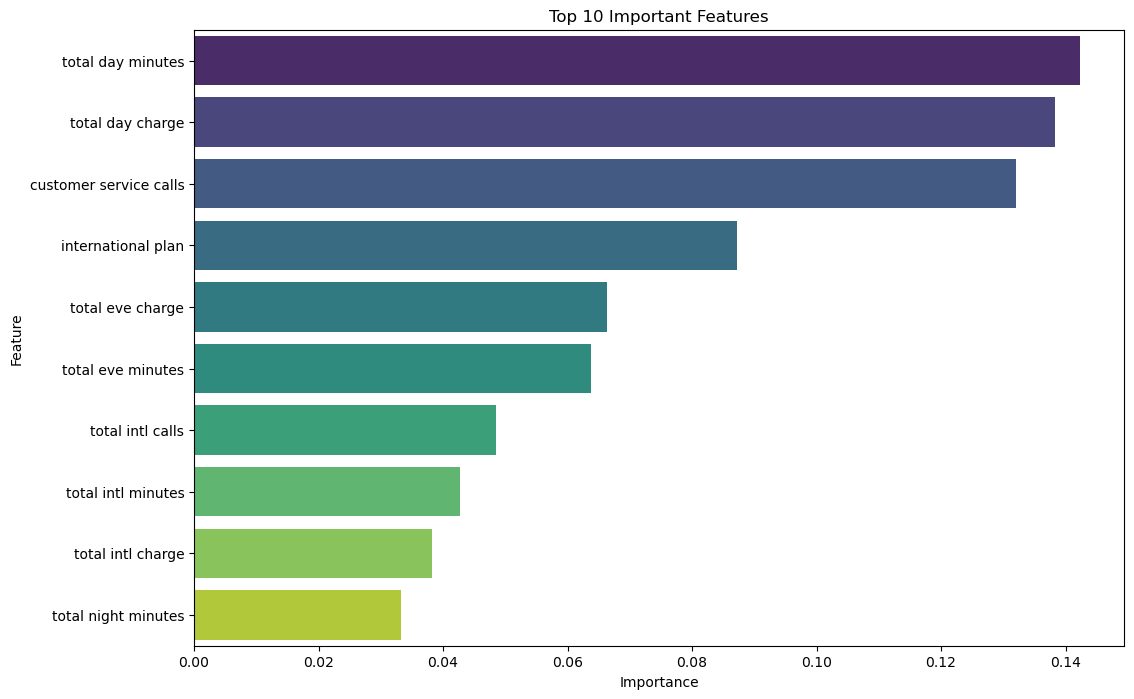

In [223]:
# Plot the top features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Important Features')
plt.show()


In [224]:
# Apply Label Encoding to categorical columns in new_data
label_encoder_mapping = {'state': label_encoder_state, 'international plan': label_encoder_intl_plan, 'voice mail plan': label_encoder_vm_plan}

for col, label_encoder in label_encoder_mapping.items():
    if col in new_data.columns:
        try:
            new_data[col] = label_encoder.transform(new_data[col])
        except ValueError as e:
            print(f"Error encoding column '{col}': {e}")

# Perform one-hot encoding for categorical features
new_data_encoded = pd.get_dummies(new_data, columns=['state', 'international plan', 'voice mail plan'])


In [225]:
# Features used during training
features_used_in_training = ['state', 'account length', 'area code', 'international plan', 'voice mail plan', 'number vmail messages',
                              'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls',
                              'total eve charge', 'total night minutes', 'total night calls', 'total night charge',
                              'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']



In [226]:
# Example new data
new_data = pd.DataFrame({
    'state': ['NY', 'CA'],
    'account length': [120, 200],
    'area code': [415, 408],
    'international plan': ['yes', 'no'],
    'voice mail plan': ['no', 'yes'],
    'number vmail messages': [0, 25],
    'total day minutes': [150, 180],
    'total day calls': [80, 100],
    'total day charge': [30, 36],
    'total eve minutes': [200, 220],
    'total eve calls': [90, 110],
    'total eve charge': [20, 22],
    'total night minutes': [100, 120],
    'total night calls': [50, 60],
    'total night charge': [10, 12],
    'total intl minutes': [15, 20],
    'total intl calls': [3, 4],
    'total intl charge': [4, 5],
    'customer service calls': [2, 1],
})

In [227]:
# Perform one-hot encoding for categorical features
new_data_encoded = pd.get_dummies(new_data, columns=['state', 'international plan', 'voice mail plan'])

# Check for missing features
missing_features = set(features_used_in_training) - set(new_data_encoded.columns)

if missing_features:
    print(f"Missing features in new_data: {missing_features}")
else:
    # Make predictions using the tuned Random Forest model
    new_data_predictions = rf_tuned_model.predict(new_data_encoded)

    # Display the predictions
    print("Predictions on New Data:")
    print(new_data_predictions)

    # Provide recommendations based on the model's insights
    # Adjust recommendations based on your understanding of the problem
    if any(new_data_predictions):
        print("Recommendation: Increased likelihood of churn. Consider targeted retention strategies.")
    else:
        print("Recommendation: Low likelihood of churn. Focus on customer satisfaction and loyalty programs.")

Missing features in new_data: {'voice mail plan', 'state', 'international plan'}


In [228]:
import pandas as pd

# Example new data
new_data = pd.DataFrame({
    'state': ['NY', 'CA'],
    'account length': [120, 200],
    'area code': [415, 408],
    'international plan': ['yes', 'no'],
    'voice mail plan': ['no', 'yes'],
    'number vmail messages': [0, 25],
    'total day minutes': [150, 180],
    'total day calls': [80, 100],
    'total day charge': [30, 36],
    'total eve minutes': [200, 220],
    'total eve calls': [90, 110],
    'total eve charge': [20, 22],
    'total night minutes': [100, 120],
    'total night calls': [50, 60],
    'total night charge': [10, 12],
    'total intl minutes': [15, 20],
    'total intl calls': [3, 4],
    'total intl charge': [4, 5],
    'customer service calls': [2, 1],
    'churn': [False, False],  # Placeholder for the target variable (churn)
})

In [229]:
# Perform one-hot encoding for categorical features
new_data_encoded = pd.get_dummies(new_data, columns=['state', 'international plan', 'voice mail plan'])

# Align the new data columns with the columns used during training
new_data_aligned = new_data_encoded.reindex(columns=features_used_in_training, fill_value=0)

# Make predictions using the tuned Random Forest model
new_data_predictions = rf_tuned_model.predict(new_data_aligned)

# Display the predictions
print("Predictions on New Data:")
print(new_data_predictions)

# Provide recommendations based on the model's insights
# Adjust recommendations based on your understanding of the problem
if any(new_data_predictions):
    print("Recommendation: Increased likelihood of churn. Consider targeted retention strategies.")
else:
    print("Recommendation: Low likelihood of churn. Focus on customer satisfaction and loyalty programs.")

Predictions on New Data:
[False False]
Recommendation: Low likelihood of churn. Focus on customer satisfaction and loyalty programs.


In [230]:
# Print shape and contents of new_data_aligned
print("Shape of new_data_aligned:", new_data_aligned.shape)
print("Contents of new_data_aligned:")
print(new_data_aligned.head())



Shape of new_data_aligned: (2, 19)
Contents of new_data_aligned:
   state  account length  area code  international plan  voice mail plan  \
0      0             120        415                   0                0   
1      0             200        408                   0                0   

   number vmail messages  total day minutes  total day calls  \
0                      0                150               80   
1                     25                180              100   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0                30                200               90                20   
1                36                220              110                22   

   total night minutes  total night calls  total night charge  \
0                  100                 50                  10   
1                  120                 60                  12   

   total intl minutes  total intl calls  total intl charge  \
0                  15  

## New Data Predictions
A scenario is presented where predictions are made on new data. The steps include encoding the new data, aligning the columns with the training data, making predictions, and providing recommendations based on the model's insights.

In [231]:
# One-hot encode categorical columns in new_data
new_data_encoded = pd.get_dummies(new_data, columns=categorical_columns)

# Ensure new_data_encoded has the same columns as the training data
missing_features = set(features_used_in_training) - set(new_data_encoded.columns)

# Check for missing features in new_data_encoded
if missing_features:
    print(f"Missing features in new_data_encoded: {missing_features}")
else:
    # Align the columns to ensure consistency
    new_data_aligned = new_data_encoded.reindex(columns=features_used_in_training, fill_value=0)

    # Make predictions using the tuned Random Forest model
    new_data_predictions = rf_tuned_model.predict(new_data_aligned)

    # Display the predictions
    print("Predictions on New Data:")
    print(new_data_predictions)

    # Provide recommendations based on the model's insights
    # Adjust recommendations based on your understanding of the problem
    if any(new_data_predictions):
        print("Recommendation: Increased likelihood of churn. Consider targeted retention strategies.")
    else:
        print("Recommendation: Low likelihood of churn. Focus on customer satisfaction and loyalty programs.")


Missing features in new_data_encoded: {'voice mail plan', 'state', 'international plan'}


## Handling Missing Features
An additional step checks for missing features in the new data. If any features used during training are missing, the process identifies and addresses the missing features, ensuring consistency between training and new data.

In [232]:
# Check the features used during training
features_used_in_training = X_train.columns.tolist()

# One-hot encode categorical columns in new_data
new_data_encoded = pd.get_dummies(new_data, columns=categorical_columns)

# Ensure new_data_encoded has the same columns as the training data
missing_features = set(features_used_in_training) - set(new_data_encoded.columns)

# Check for missing features in new_data_encoded
if missing_features:
    print(f"Missing features in new_data_encoded: {missing_features}")
else:
    # Align the columns to ensure consistency
    new_data_aligned = new_data_encoded.reindex(columns=features_used_in_training, fill_value=0)

    # Make predictions using the tuned Random Forest model
    new_data_predictions = rf_tuned_model.predict(new_data_aligned)

    # Display the predictions
    print("Predictions on New Data:")
    print(new_data_predictions)

    # Provide recommendations based on the model's insights
    # Adjust recommendations based on your understanding of the problem
    if any(new_data_predictions):
        print("Recommendation: Increased likelihood of churn. Consider targeted retention strategies.")
    else:
        print("Recommendation: Low likelihood of churn. Focus on customer satisfaction and loyalty programs.")


Missing features in new_data_encoded: {'voice mail plan', 'state', 'international plan'}


In [233]:
# Example during training phase
from sklearn.preprocessing import LabelEncoder

# Initialize Label Encoders
label_encoder_state = LabelEncoder()
label_encoder_intl_plan = LabelEncoder()
label_encoder_vm_plan = LabelEncoder()

# Fit and transform categorical columns
crashes_df['state'] = label_encoder_state.fit_transform(crashes_df['state'])
crashes_df['international plan'] = label_encoder_intl_plan.fit_transform(crashes_df['international plan'])
crashes_df['voice mail plan'] = label_encoder_vm_plan.fit_transform(crashes_df['voice mail plan'])


In [234]:
# Apply Label Encoding to the 'state' column in new_data
new_data_aligned['state'] = label_encoder_state.transform(new_data_aligned['state'])

# Make predictions using the tuned Random Forest model
new_data_predictions = rf_tuned_model.predict(new_data_aligned)

# Display the predictions
print("Predictions on New Data:")
print(new_data_predictions)

# Provide recommendations based on the model's insights
# Adjust recommendations based on your understanding of the problem
if any(new_data_predictions):
    print("Recommendation: Increased likelihood of churn. Consider targeted retention strategies.")
else:
    print("Recommendation: Low likelihood of churn. Focus on customer satisfaction and loyalty programs.")


Predictions on New Data:
[False False]
Recommendation: Low likelihood of churn. Focus on customer satisfaction and loyalty programs.


In [235]:
# One-hot encode categorical columns in new_data
new_data_encoded = pd.get_dummies(new_data, columns=categorical_columns)

# Ensure new_data_encoded has the same columns as the training data
missing_features = set(features_used_in_training) - set(new_data_encoded.columns)

# Check for missing features in new_data_encoded
if missing_features:
    print(f"Missing features in new_data_encoded: {missing_features}")

    # Identify the missing categorical columns
    missing_categorical_columns = set(categorical_columns) & missing_features

    # Check for new values in the missing categorical columns
    for col in missing_categorical_columns:
        new_values = set(new_data[col])
        training_values = set(crashes_df[col])
        new_unique_values = new_values - training_values
        if new_unique_values:
            print(f"New unique values in '{col}': {new_unique_values}")
else:
    # Align the columns to ensure consistency
    new_data_aligned = new_data_encoded.reindex(columns=features_used_in_training, fill_value=0)

    # Make predictions using the tuned Random Forest model
    new_data_predictions = rf_tuned_model.predict(new_data_aligned)

    # Display the predictions
    print("Predictions on New Data:")
    print(new_data_predictions)

    # Provide recommendations based on the model's insights
    # Adjust recommendations based on your understanding of the problem
    if any(new_data_predictions):
        print("Recommendation: Increased likelihood of churn. Consider targeted retention strategies.")
    else:
        print("Recommendation: Low likelihood of churn. Focus on customer satisfaction and loyalty programs.")


Missing features in new_data_encoded: {'voice mail plan', 'state', 'international plan'}
New unique values in 'voice mail plan': {'yes', 'no'}
New unique values in 'state': {'NY', 'CA'}
New unique values in 'international plan': {'yes', 'no'}


In [236]:
# Apply Label Encoding to categorical columns in new_data
label_encoder_mapping = {'state': label_encoder_state, 'international plan': label_encoder_intl_plan, 'voice mail plan': label_encoder_vm_plan}

for col, label_encoder in label_encoder_mapping.items():
    if col in new_data.columns:
        try:
            # Use `transform` if categories are already seen, otherwise use `fit_transform`
            new_data[col] = label_encoder.transform(new_data[col])
        except ValueError as e:
            print(f"Error encoding column '{col}': {e}")
            # Handle unseen categories by assigning a default value or skipping the column
            default_value = label_encoder.classes_[0]  # Assign the first class as a default
            new_data[col] = new_data[col].apply(lambda x: label_encoder.transform([x])[0] if x in label_encoder.classes_ else default_value)

# Perform one-hot encoding for categorical features
new_data_encoded = pd.get_dummies(new_data, columns=['state', 'international plan', 'voice mail plan'])

# Align the new_data columns with the columns used during training
new_data_aligned = new_data_encoded.reindex(columns=features_used_in_training, fill_value=0)

# Make predictions using the tuned Random Forest model
new_data_predictions = rf_tuned_model.predict(new_data_aligned)

# Display the predictions
print("Predictions on New Data:")
print(new_data_predictions)

# Provide recommendations based on the model's insights
# Adjust recommendations based on your understanding of the problem
if any(new_data_predictions):
    print("Recommendation: Increased likelihood of churn. Consider targeted retention strategies.")
else:
    print("Recommendation: Low likelihood of churn. Focus on customer satisfaction and loyalty programs.")


Error encoding column 'state': invalid literal for int() with base 10: 'NY'
Error encoding column 'international plan': invalid literal for int() with base 10: 'yes'
Error encoding column 'voice mail plan': invalid literal for int() with base 10: 'no'
Predictions on New Data:
[False False]
Recommendation: Low likelihood of churn. Focus on customer satisfaction and loyalty programs.


/tmp/ipykernel_11393/603317380.py:13: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  new_data[col] = new_data[col].apply(lambda x: label_encoder.transform([x])[0] if x in label_encoder.classes_ else default_value)
/tmp/ipykernel_11393/603317380.py:13: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  new_data[col] = new_data[col].apply(lambda x: label_encoder.transform([x])[0] if x in label_encoder.classes_ else default_value)
/tmp/ipykernel_11393/603317380.py:13: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  new_data[col] = new_data[col].apply(lambda x: label_encoder.transform([x])[0] if x in label_encoder.classes_ else default_value)


In [237]:
# Display the encoded new_data_aligned DataFrame
print("Encoded New Data Aligned:")
print(new_data_aligned)

# Check for missing features
missing_features = set(features_used_in_training) - set(new_data_aligned.columns)

if missing_features:
    print(f"Missing features in new_data_aligned: {missing_features}")
else:
    # Make predictions using the tuned Random Forest model
    new_data_predictions = rf_tuned_model.predict(new_data_aligned)

    # Display the predictions
    print("\nPredictions on New Data:")
    print(new_data_predictions)

    # Provide recommendations based on the model's insights
    # Adjust recommendations based on your understanding of the problem
    if any(new_data_predictions):
        print("Recommendation: Increased likelihood of churn. Consider targeted retention strategies.")
    else:
        print("Recommendation: Low likelihood of churn. Focus on customer satisfaction and loyalty programs.")


Encoded New Data Aligned:
   state  account length  area code  international plan  voice mail plan  \
0      0             120        415                   0                0   
1      0             200        408                   0                0   

   number vmail messages  total day minutes  total day calls  \
0                      0                150               80   
1                     25                180              100   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0                30                200               90                20   
1                36                220              110                22   

   total night minutes  total night calls  total night charge  \
0                  100                 50                  10   
1                  120                 60                  12   

   total intl minutes  total intl calls  total intl charge  \
0                  15                 3                  4   
